<a href="https://colab.research.google.com/github/mohammed21kamall/Graduation-Project/blob/main/K_Means_Clusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


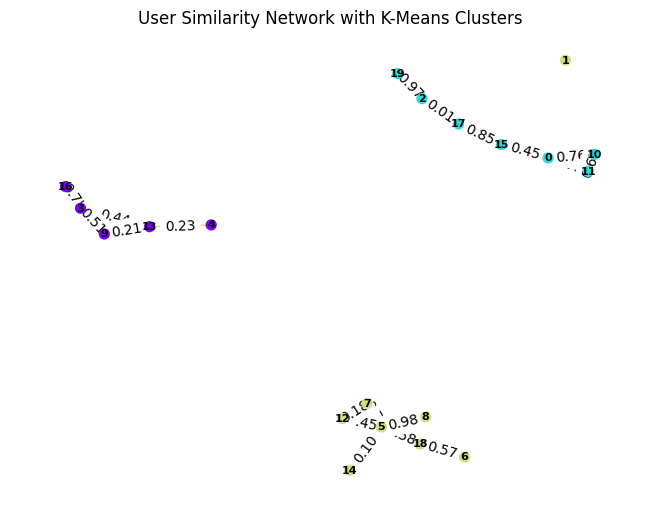

In [102]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

# بيانات المستخدمين والتشابه
num_users = 20
users = np.arange(num_users)
similarity_matrix = np.random.rand(num_users, num_users)

# تحديد عدد الجيران (k)
k = 3

# نمذجة KNN
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')
knn_model.fit(similarity_matrix)

# الحصول على الجيران الأقرب لكل مستخدم
distances, indices = knn_model.kneighbors(similarity_matrix)

# تحديد عدد المجموعات باستخدام K-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
user_clusters = kmeans.fit_predict(similarity_matrix)

# إعداد الألوان المستخدمة للعقد والحواف
node_colors = plt.cm.rainbow(user_clusters.astype(float) / num_clusters)
edge_colors = [node_colors[i] for i in range(num_users) for j in indices[i] if i != j and user_clusters[i] == user_clusters[j]]

# رسم الشبكة
G = nx.Graph()

# إضافة العقد (المستخدمين)
for user, color in zip(users, node_colors):
    G.add_node(user, color=color)

# إضافة الروابط بين المستخدمين وفقًا للجيران في نفس المجموعة
for i in range(num_users):
    for j in indices[i]:
        if i != j and user_clusters[i] == user_clusters[j]:
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# حساب مواقع العقد باستخدام "spring_layout" لتجنب التداخل
pos = nx.spring_layout(G)

# رسم الشبكة بتحديد ألوان مختلفة لكل مجموعة
nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold', font_size=8, node_size=50, edge_color=edge_colors)
edge_labels = {(i, j): f"{similarity_matrix[i][j]:.2f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("User Similarity Network with K-Means Clusters")
plt.show()


In [105]:
# Nearest neighbors for a given k from users with distances
k_nearest_users = {}
k_neighbors_count = k  # You can change this value to the desired one

print(f"Nearest {k_neighbors_count} users for each user:")
for i in range(num_users):
    k_nearest_users[i] = {"neighbors": indices[i][1:k_neighbors_count + 1], "distances": distances[i][1:k_neighbors_count + 1]}

for i in range(num_users):
    current_user = i
    neighbors_count = len(k_nearest_users[current_user]["neighbors"])
    same_neighbors_count = sum(
        1 for user in k_nearest_users.values() if current_user in user["neighbors"]
    )

    print(f"User {current_user}:")
    for neighbor, distance in zip(k_nearest_users[current_user]["neighbors"], k_nearest_users[current_user]["distances"]):
        print(f"   User {neighbor} at distance {distance:.2f}")
    print(f"   {same_neighbors_count} users share the same neighbors.")
    print()


Nearest 3 users for each user:
User 0:
   User 11 at distance 0.09
   User 10 at distance 0.11
   3 users share the same neighbors.

User 1:
   User 2 at distance 0.14
   User 19 at distance 0.15
   2 users share the same neighbors.

User 2:
   User 19 at distance 0.07
   User 1 at distance 0.14
   5 users share the same neighbors.

User 3:
   User 16 at distance 0.09
   User 13 at distance 0.09
   4 users share the same neighbors.

User 4:
   User 13 at distance 0.12
   User 6 at distance 0.13
   0 users share the same neighbors.

User 5:
   User 18 at distance 0.09
   User 14 at distance 0.11
   5 users share the same neighbors.

User 6:
   User 3 at distance 0.09
   User 16 at distance 0.09
   3 users share the same neighbors.

User 7:
   User 5 at distance 0.12
   User 12 at distance 0.15
   0 users share the same neighbors.

User 8:
   User 2 at distance 0.17
   User 5 at distance 0.19
   0 users share the same neighbors.

User 9:
   User 3 at distance 0.12
   User 13 at distance 